# **Hearth failure prediction proyect**

## Objectives

* Fetch a Dataset from Kaggle, save as raw Data, extract, clean analyse and save said data as clean, 
## Inputs

* Heart Failure Prediction Dataset

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\organ\\Desktop\\Code institute\\python\\test2-code-institute\\Hearth_Proyect\\Heart_Failure_Prediction_Proyect\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\organ\\Desktop\\Code institute\\python\\test2-code-institute\\Hearth_Proyect\\Heart_Failure_Prediction_Proyect'

# Configure the enviroment, charge the data Raw and import Libraries

Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Charge Raw Data 

In [5]:
file_path = "C:\\Users\\organ\\Desktop\\Code institute\\python\\test2-code-institute\\Hearth_Proyect\\Heart_Failure_Prediction_Proyect\\Dataset\\Raw\\Heart_prediction.csv"
df = pd.read_csv(file_path)
print(df.head(5))
print(df.dtypes) #check the data types of the columns


   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82               7.942542   
3   72       1             93          183        101               6.495155   
4   37       0            145          166        103               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1  
Age                        int64
Gender                     int64
BloodPressure              int64
Cholesterol                int64
HeartRate                  int64
QuantumPatternFeature    float64
HeartDisease               int64
dtype: object


# Clean and Transform Data (ETL)

Clean the Data

In [6]:
#check for null values
df = df.dropna() #drop any rows with null values if any
df.isnull().sum() #0 null values in all columns
#check for duplicates
df = df.drop_duplicates() #remove duplicates if any
df.duplicated().sum() #0 duplicates



0

Convert Data

there is no need in this dataset to change categorical to numerical, but if needed we can change it so

In [7]:
#df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0}).astype("Int64") #convert categorical to numerical
print(df.dtypes) #check the data types of the columns

Age                        int64
Gender                     int64
BloodPressure              int64
Cholesterol                int64
HeartRate                  int64
QuantumPatternFeature    float64
HeartDisease               int64
dtype: object


---

# Save clean data on a new folder

In [8]:
df.to_csv("Dataset/Cleaned/clean_Heart_data.csv", index = False) #save the cleaned data to a new csv file
df = pd.read_csv("Dataset/Cleaned/clean_Heart_data.csv") #read the cleaned data
print(df.head(5)) #show the first 5 rows of the cleaned data

   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82               7.942542   
3   72       1             93          183        101               6.495155   
4   37       0            145          166        103               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1  


# Data Visualisation

Start with the Data Visualization
we will see the data in diferent forms of visualizations including
- Histograms
- Distplot
- KDE
- Boxplot
- Swarmplot
- Heatmaps

A Histogram of Age to see how it varies in my Dataset

<Axes: >

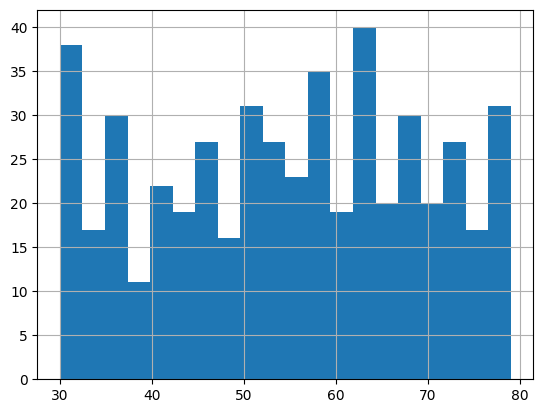

In [9]:
df.describe() #show the statistics of the cleaned data
df['Age'].hist(bins=20) #show the histogram of the Age column

A correlation Matrix to see how important are certain type of Features
in this Heatmap you will see that 
Age
Cholesterol
HeartDisease
Are the most important in terms of correlation

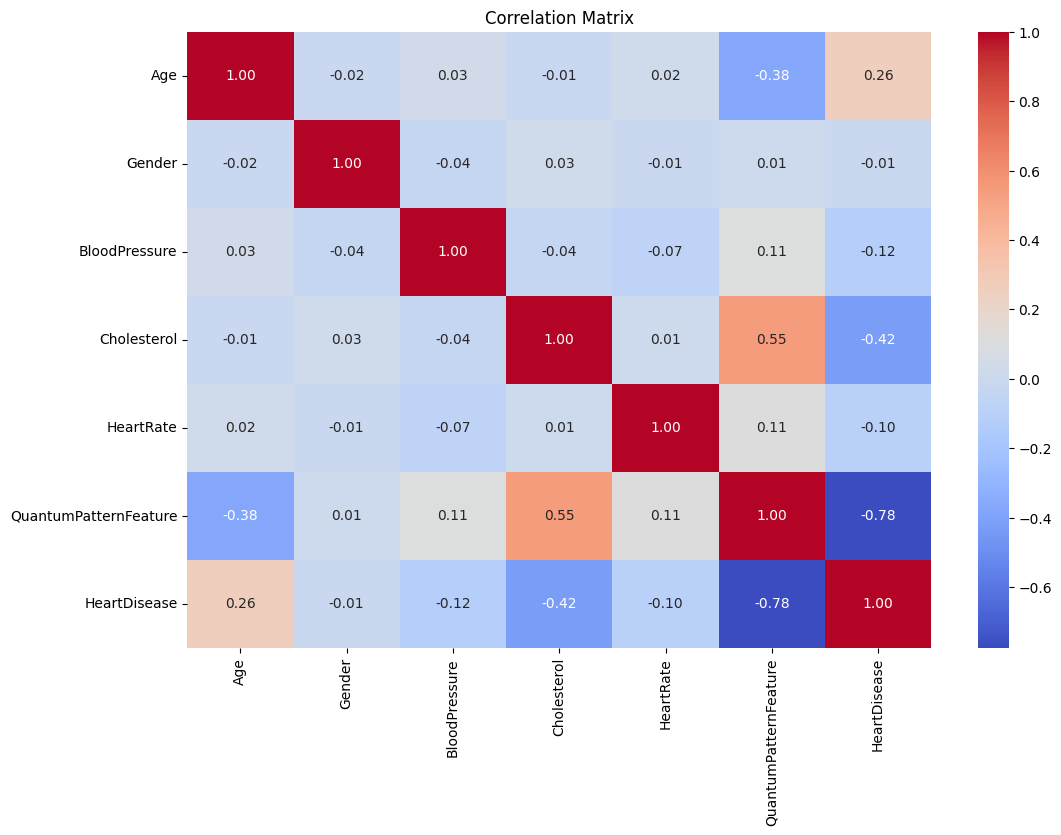

In [10]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:

# correlation between QuantumPatternFeature and HeartDisease
correlation = df.corr()["HeartDisease"]["QuantumPatternFeature"]
print(f"Correlation between QuantumPatternFeature and HeartDisease: {correlation}")
correlation = df.corr()["HeartDisease"]["Age"]
print(f"Correlation between Age and HeartDisease: {correlation}")
correlation = df.corr()["HeartDisease"]["Cholesterol"]
print(f"Correlation between Cholesterol and HeartDisease: {correlation}")
correlation = df.corr()["HeartDisease"]["HeartRate"]
print(f"Correlation between HeartRate and HeartDisease: {correlation}")


Correlation between QuantumPatternFeature and HeartDisease: -0.7751602604103337
Correlation between Age and HeartDisease: 0.2582975096680483
Correlation between Cholesterol and HeartDisease: -0.4235297931362231
Correlation between HeartRate and HeartDisease: -0.10271983069441311


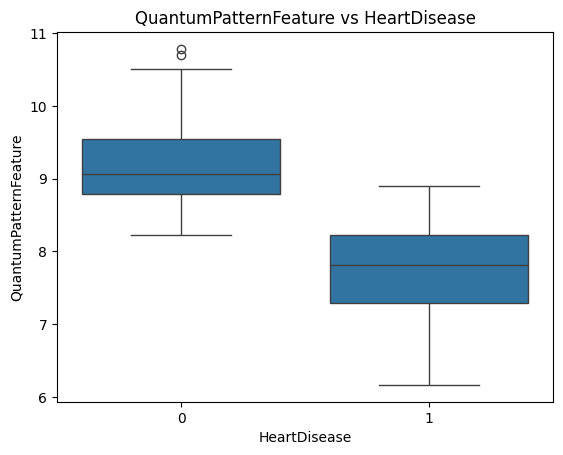

In [12]:


sns.boxplot(x=df["HeartDisease"], y=df["QuantumPatternFeature"])
plt.title("QuantumPatternFeature vs HeartDisease")
plt.show()


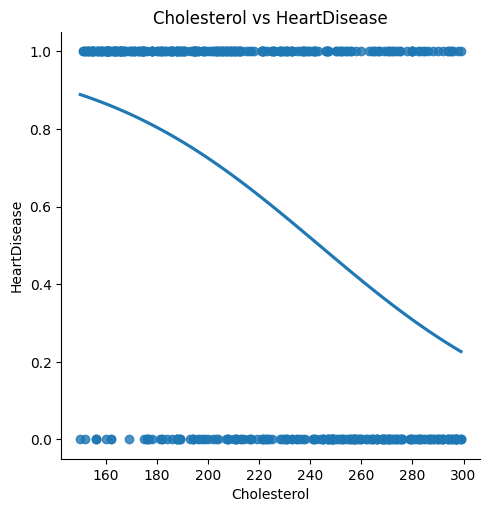

In [13]:
sns.lmplot(x="Cholesterol", y="HeartDisease", data=df, logistic=True, ci=None)
plt.title("Cholesterol vs HeartDisease")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

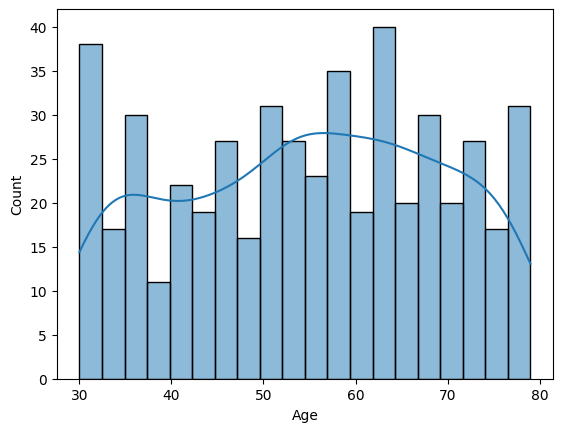

In [15]:
sns.histplot(df['Age'], bins=20, kde=True)

<Axes: xlabel='Gender', ylabel='Count'>

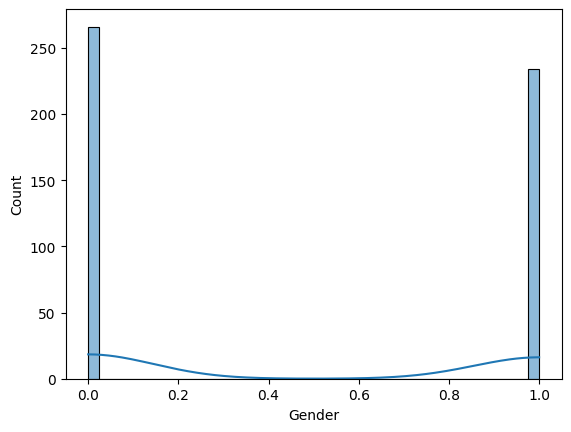

In [16]:
sns.histplot(df['Gender'], bins=40, kde=True)

<Axes: xlabel='Cholesterol', ylabel='Count'>

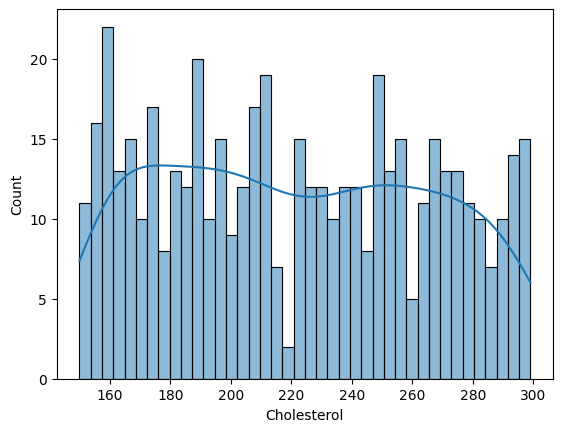

In [17]:
sns.histplot(df['Cholesterol'], bins=40, kde=True)

<Axes: xlabel='HeartDisease', ylabel='Count'>

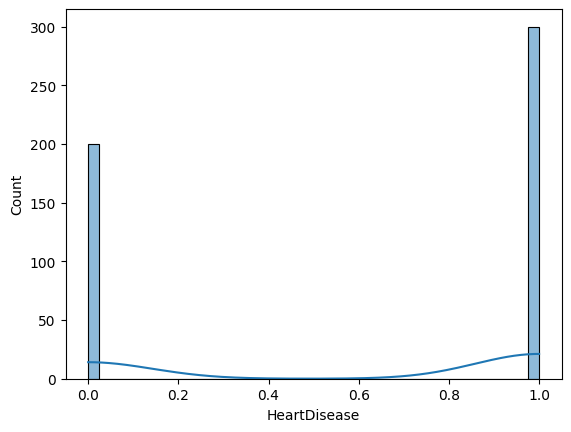

In [18]:
sns.histplot(df['HeartDisease'], bins=40, kde=True)

<Axes: xlabel='HeartRate', ylabel='Count'>

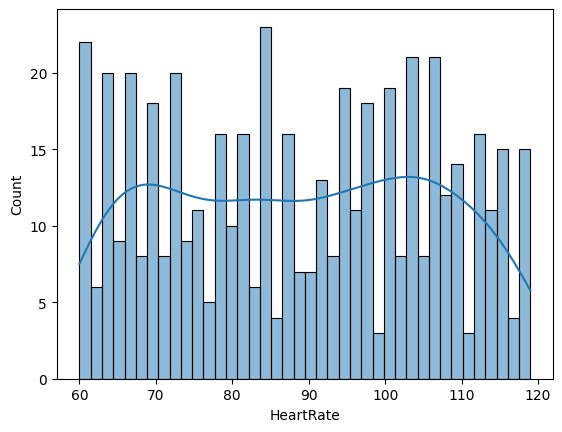

In [19]:
sns.histplot(df['HeartRate'], bins=40, kde=True)

Heartdisease and Cholesterol distribution

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

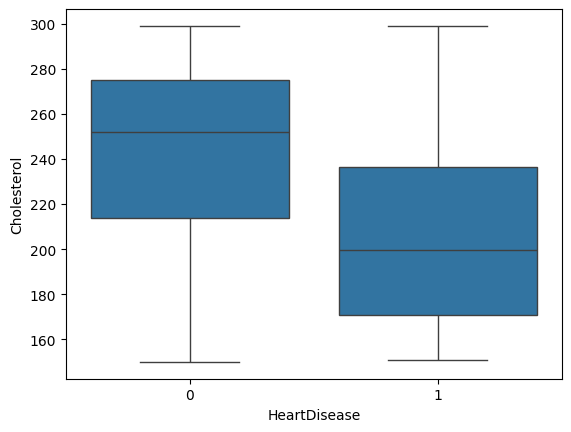

In [20]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)


Use of KDE plots for better visualization on the most important keys of HeartDisease

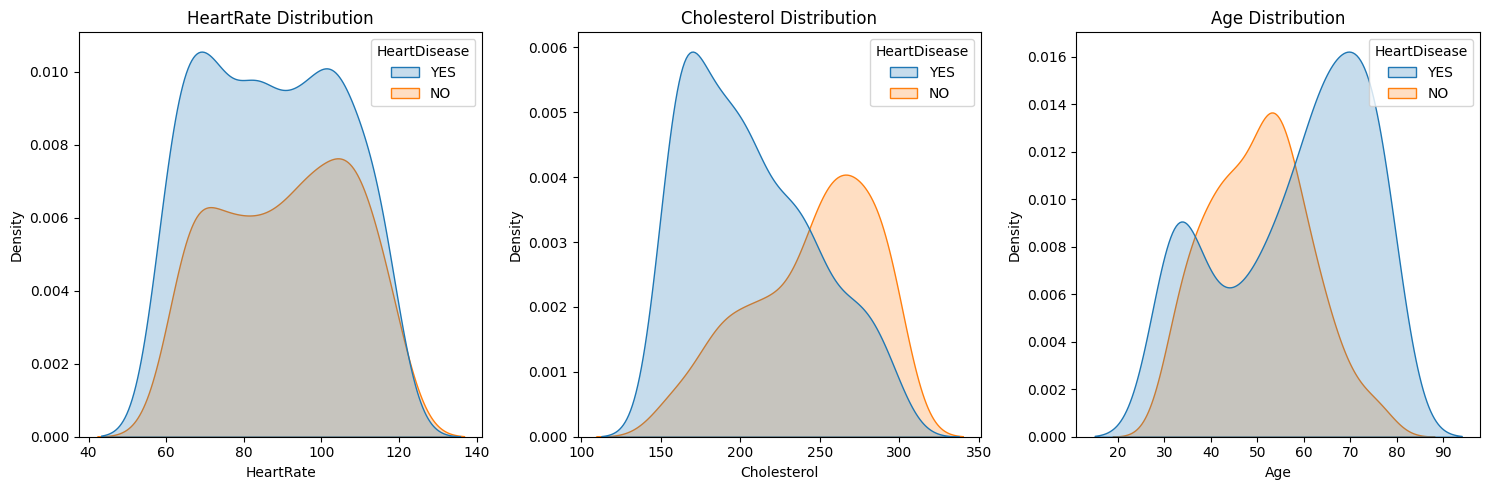

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df["HeartDisease"] = df["HeartDisease"].replace({0: "NO", 1: "YES"})
# KDE de HeartRate
sns.kdeplot(data=df, x="HeartRate", hue="HeartDisease", fill=True, ax=axes[0])
axes[0].set_title("HeartRate Distribution")
# KDE de Cholesterol
sns.kdeplot(data=df, x="Cholesterol", hue="HeartDisease", fill=True, ax=axes[1])
axes[1].set_title("Cholesterol Distribution")
# KDE de Age
sns.kdeplot(data=df, x="Age", hue="HeartDisease", fill=True, ax=axes[2])
axes[2].set_title("Age Distribution")
plt.tight_layout()
plt.show()

KDE showing that Cholesterol, HeartRate and BloodPressure Distribution are pretty much the same across genders

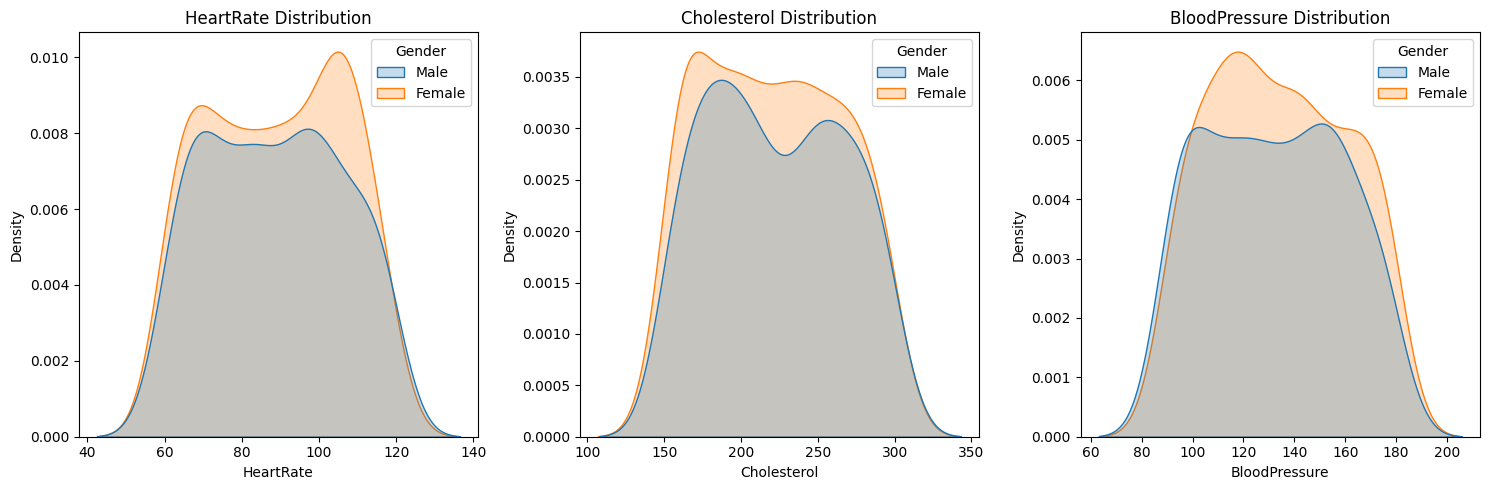

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df["Gender"] = df["Gender"].replace({0: "Female", 1: "Male"})
# KDE de HeartRate
sns.kdeplot(data=df, x="HeartRate", hue="Gender", fill=True, ax=axes[0])
axes[0].set_title("HeartRate Distribution")
# KDE de Cholesterol
sns.kdeplot(data=df, x="Cholesterol", hue="Gender", fill=True, ax=axes[1])
axes[1].set_title("Cholesterol Distribution")
# KDE de Age
sns.kdeplot(data=df, x="BloodPressure", hue="Gender", fill=True, ax=axes[2])
axes[2].set_title("BloodPressure Distribution")
plt.tight_layout()
plt.show()


<Axes: xlabel='HeartRate', ylabel='Cholesterol'>

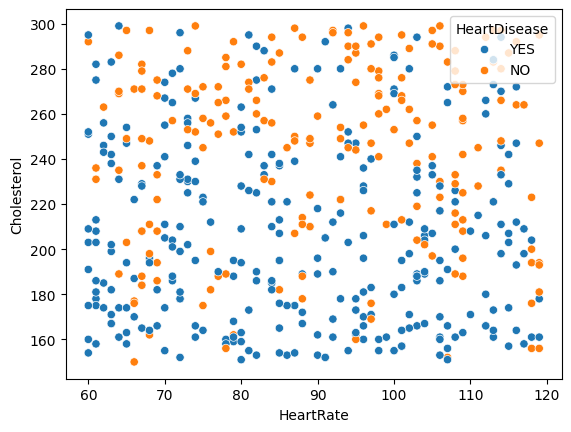

In [24]:
sns.scatterplot(x='HeartRate', y='Cholesterol', hue='HeartDisease', data=df)


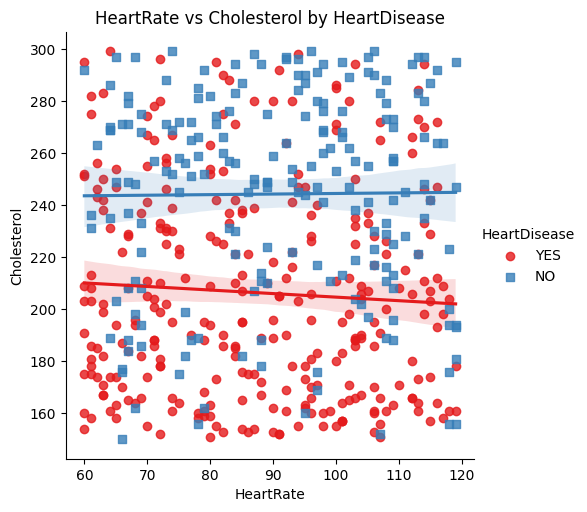

In [26]:
sns.lmplot(x='HeartRate', y='Cholesterol', data=df, hue='HeartDisease', markers=["o", "s"], palette="Set1")
plt.title("HeartRate vs Cholesterol by HeartDisease")
plt.show()

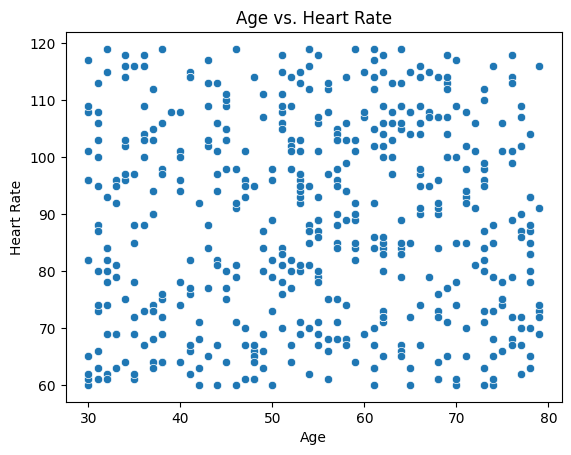

In [27]:
sns.scatterplot(x='Age', y='HeartRate', data=df)
plt.title('Age vs. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()

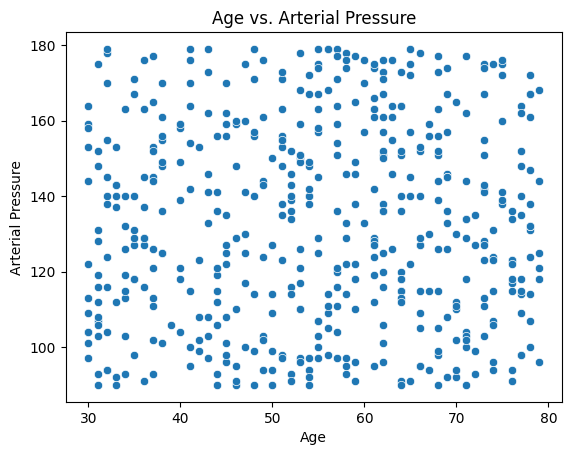

In [28]:
sns.scatterplot(x='Age', y='BloodPressure', data=df)
plt.title('Age vs. Arterial Pressure')
plt.xlabel('Age')
plt.ylabel('Arterial Pressure')
plt.show()


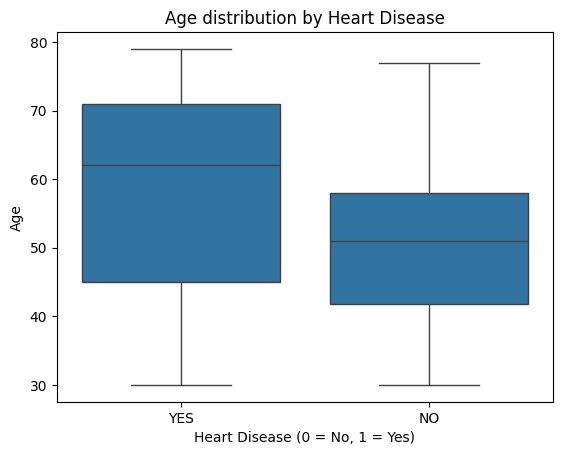

In [29]:
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age distribution by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()



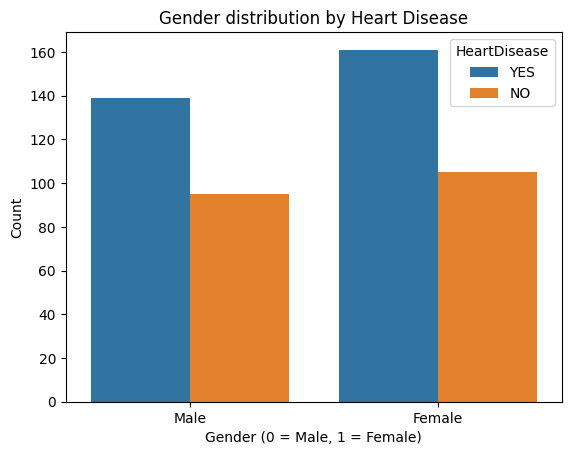

In [30]:
sns.countplot(x="Gender", hue="HeartDisease", data=df)
plt.title("Gender distribution by Heart Disease")
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

---

---

# Conclusions 

My final Thoughts are that i am surprised with what i had found in this proyect. 
as i first thought, Age and heart rate are important factors to determine the risk of heart Diseases, but the negative relation between cholesterol and HeartDisease is something i was not expecting. I asume this is because the people with the affliction are more carefull with their diets so they reduce the high level of cholesterol